In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [251]:
def regression(x,y):
    perp = x.T.dot(y)
    val = np.linalg.inv(x.T.dot(x)).dot(perp)
    return val

In [275]:
sub = gradAd.drop('Chance of Admit ', axis = 1)
sub.insert(loc = 0,column = 'bias', value = 1)
ls = []
for i in range(500):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    add = {'GRE Score': gradAd['GRE Score'][i]+(j-1),
                           'TOEFL Score': gradAd['TOEFL Score'][i]+(k-1),
                           'University Rating': gradAd['University Rating'][i],
                            'SOP': gradAd['SOP'][i],
                            'LOR ': gradAd['LOR '][i],
                            'CGPA': gradAd['CGPA'][i]+(l-1)*0.01,
                             'Research': gradAd['Research'][i],
                            'Chance of Admit ': gradAd['Chance of Admit '][i]+(m-1)/100}
                    ls.append(add)
    if(i%25 == 0):
        print("{} of 20".format(i/25))
Xdf = pd.DataFrame(ls,columns = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit '])
#Xdf = gradAd
Xdf.insert(loc = 0,column = 'bias',value = 1)
Ydf = Xdf['Chance of Admit ']
Xdf.drop('Chance of Admit ',axis = 1,inplace = True)
x = np.array(Xdf)
y = np.array(Ydf)
y = y.reshape(y.shape[0],1)

0.0 of 20
1.0 of 20
2.0 of 20
3.0 of 20
4.0 of 20
5.0 of 20
6.0 of 20
7.0 of 20
8.0 of 20
9.0 of 20
10.0 of 20
11.0 of 20
12.0 of 20
13.0 of 20
14.0 of 20
15.0 of 20
16.0 of 20
17.0 of 20
18.0 of 20
19.0 of 20


In [276]:
x

array([[  1.  , 336.  , 117.  , ...,   4.5 ,   9.64,   1.  ],
       [  1.  , 336.  , 117.  , ...,   4.5 ,   9.64,   1.  ],
       [  1.  , 336.  , 117.  , ...,   4.5 ,   9.64,   1.  ],
       ...,
       [  1.  , 328.  , 114.  , ...,   4.5 ,   9.05,   0.  ],
       [  1.  , 328.  , 114.  , ...,   4.5 ,   9.05,   0.  ],
       [  1.  , 328.  , 114.  , ...,   4.5 ,   9.05,   0.  ]])

In [277]:
x.shape

(40500, 8)

In [278]:
chooser = np.array([True if np.random.random() <= 0.7 else False for i in range(40500)])
x_train = x[chooser]
y_train = y[chooser]
x_test = x[~chooser]
y_test = y[~chooser]

In [279]:
x_test.shape

(12057, 8)

In [280]:
theta = regression(x_train,y_train)

In [281]:
theta

array([[-1.27508185],
       [ 0.00187216],
       [ 0.00258145],
       [ 0.00619485],
       [ 0.0013426 ],
       [ 0.01668867],
       [ 0.12037999],
       [ 0.02374992]])

(array([  50.,  106.,  256.,  408.,  776., 2751., 4841., 2251.,  537.,
          81.]),
 array([-0.28082471, -0.23550065, -0.1901766 , -0.14485254, -0.09952848,
        -0.05420443, -0.00888037,  0.03644368,  0.08176774,  0.12709179,
         0.17241585]),
 <a list of 10 Patch objects>)

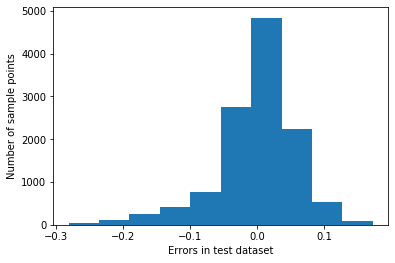

In [289]:
plt.xlabel('Errors in test dataset')
plt.ylabel('Number of sample points')
plt.hist(y_test - x_test.dot(theta),bins = 10)

In [283]:
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

In [284]:
error = y_test - x_test.dot(theta)
error = list(error)
error.sort()
getbounds(error,10)

(array([-0.11990044]), array([0.08267586]))

In [285]:
y_test[np.abs(y_test - x_test.dot(theta)) >0.05].shape[0]/y_test.shape[0]

0.2999087666915485

In [286]:
x_test.dot(theta)

array([[0.94612615],
       [0.94612615],
       [0.94612615],
       ...,
       [0.82226371],
       [0.82364136],
       [0.82484516]])

In [287]:
np.array([1,337,118,4,4.5,4.5,9.65,1]).dot(theta)

array([0.95178356])

In [288]:
np.array([1,340,120,5,5,5,10,1]).dot(theta)

array([1.01990642])